<a href="https://colab.research.google.com/github/barbosa-renan/estudos-ia/blob/main/Classifica%C3%A7%C3%A3o_de_Textos_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [ ]:
import spacy
spacy.__version__

'3.7.5'

In [ ]:
!python -m spacy download pt_core_news_sm

In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Etapa 2: Carregamento da base de dados

In [ ]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [ ]:
base_dados.shape

(196, 2)

In [ ]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [ ]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


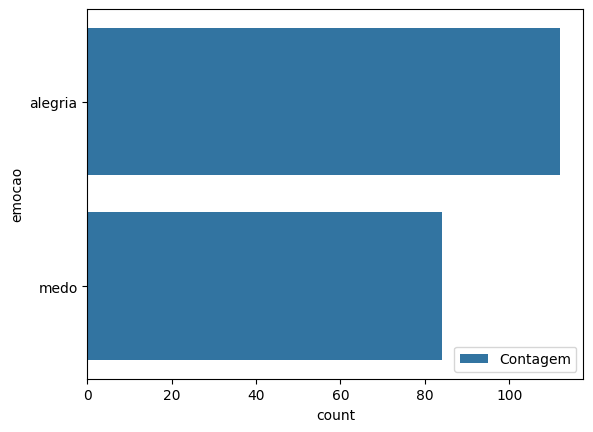

In [ ]:
sns.countplot(y='emocao', data=base_dados, label = 'Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
print(stop_words)

{'cada', 'só', 'conselho', 'esteve', 'três', 'quinto', 'fazemos', 'porém', 'veja', 'sois', 'estão', 'minhas', 'até', 'outras', 'sem', 'em', 'estiveste', 'tanto', 'logo', 'dão', 'lado', 'tais', 'da', 'sua', 'sei', 'baixo', 'saber', 'comprida', 'tal', 'cedo', 'ele', 'menor', 'apontar', 'bem', 'outra', 'pôde', 'suas', 'com', 'o', 'pouco', 'questão', 'ver', 'tivemos', 'estes', 'local', 'sexto', 'fazem', 'boa', 'nosso', 'ela', 'usa', 'foram', 'vens', 'do', 'fará', 'seus', 'pelo', 'pelas', 'custa', 'nossa', 'meio', 'ainda', 'vem', 'ir', 'dessa', 'quem', 'valor', 'tão', 'toda', 'dar', 'caminho', 'era', 'aqui', 'somente', 'aquela', 'grandes', 'uns', 'posição', 'numa', 'um', 'esses', 'partir', 'são', 'dezanove', 'a', 'dentro', 'sempre', 'te', 'obrigado', 'número', 'eu', 'nossas', 'vossa', 'tens', 'diz', 'ou', 'meus', 'aos', 'cima', 'daquela', 'todo', 'parece', 'nos', 'atrás', 'ambas', 'oito', 'através', 'tiveste', 'bom', 'os', 'isso', 'desde', 'estar', 'talvez', 'breve', 'for', 'cinco', 'máximo

In [ ]:
len(stop_words)

416

In [ ]:
#pln = spacy.load('pt')
pln = spacy.load("pt_core_news_sm")

In [ ]:
pln

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [ ]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [ ]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [ ]:
type(exemplo_base_dados)

list

In [ ]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [ ]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(exemplo_base_dados[0][1])

dict

In [ ]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_final)

196

In [ ]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
base_dados_final[0][0]

'trabalho agradável'

In [ ]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(base_dados_final[0][1])

dict

In [ ]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

# Etapa 5: Criação do classificador

In [ ]:
from spacy.training import Example

In [ ]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.7145652770996094}
{'textcat': 3.1217950316811405e-11}
{'textcat': 3.956458180824282e-12}
{'textcat': 1.0230269254884843e-12}
{'textcat': 3.6978915345401916e-13}
{'textcat': 1.5204451552088905e-13}
{'textcat': 7.622700383500425e-14}
{'textcat': 3.3092086471238347e-14}
{'textcat': 1.825600836206421e-14}
{'textcat': 9.561930160185419e-15}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.71456528e+00, 3.12179503e-11, 3.95645818e-12, 1.02302693e-12,
       3.69789153e-13, 1.52044516e-13, 7.62270038e-14, 3.30920865e-14,
       1.82560084e-14, 9.56193016e-15])

Text(0, 0.5, 'Erro')

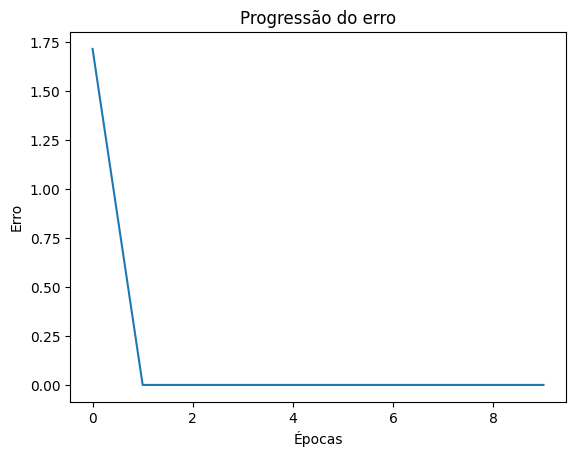

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [ ]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [ ]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [ ]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [ ]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 2.3517447544918468e-08}

In [ ]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 2.6150289613724453e-06, 'MEDO': 0.9999973773956299}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [ ]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 1.2273819294250643e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.6796623586733403e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.198019194958988e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.3961313761210477e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.5946301490952237e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.3987647423950875e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.3517447544918468e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.124476677385246e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.236235907560058e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.9864084417095e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.9709964266544375e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.1450426707380075e-09},
 {'ALEGRIA': 1.0, 'MEDO': 5.89072790546652e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.2906730734462144e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.1292619929199645e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.0592686727761702e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.530893456447302e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.1725488075219346e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.619330257720321e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.2830115636575

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [ ]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [ ]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [ ]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.5833333333333334

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[26, 22],
       [13, 23]])